# C.7.4 Random Forest 모델

In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv('2014DC2.csv')   
df.shape

(12417, 75)

In [4]:
data = df.drop(['EBizSystem2'], axis=1)   # 타겟변수를 제외한 변수를 data에 저장
target = df['EBizSystem2']                # 타겟변수만 target 데이터프레임에 저장

# 50:50 data partition.
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( 
    data, target, test_size=0.5, random_state=42)   # test_size=0.5임에 주의 

# interval 변수의 null value를 평균(mean)으로 impute 
from sklearn.impute import SimpleImputer
imp= SimpleImputer(strategy = 'mean')  
X_train2= imp.fit_transform(X_train) 
X_test2= imp.fit_transform(X_test)   # X_train과 and X_test 둘 다 imputation 적용해야 함에 유의

In [50]:
# Random Forest 모델 (Default 모델, tree depth 제한 없음)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(n_estimators = 100, random_state=0) 
model = rf.fit(X_train2, y_train) 
pred = model.predict(X_test2)  # 학습된 Classifier로 테스트 데이터셋 자료를 투입해서 타겟변수 예측값 생성

print ("Random Forest Accuracy on training set:{:.5f}".format(model.score(X_train2, y_train))) 
print ("Random Forest Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred))) 

Random Forest Accuracy on training set:1.00000
Random Forest Accuracy on test set:0.71670


In [10]:
# Random Forest 모델 (max_depth=10)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(n_estimators = 100, random_state=0, max_depth=10) 
model = rf.fit(X_train2, y_train) 
pred = model.predict(X_test2)  # 학습된 Classifier로 테스트 데이터셋 자료를 투입해서 타겟변수 예측값 생성

print ("Random Forest Accuracy on training set:{:.5f}".format(model.score(X_train2, y_train))) 
print ("Random Forest Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred))) 

Random Forest Accuracy on training set:0.90383
Random Forest Accuracy on test set:0.72121


In [51]:
# Random Forest 모델 (Default 모델, tree depth 제한 없음)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(n_estimators = 100, random_state=0) 

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold  

# StratifiedKFold의 random_state 옵션값을 특정 숫자(예: 0)로 고정
cross_validation = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
params = {'max_depth': range(2,21), 'n_estimators':[100,200]}

grid_r = GridSearchCV(rf, param_grid=params, scoring='accuracy', cv=cross_validation,\
                      verbose=1, n_jobs=-1)
grid_r.fit(X_train2, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_r.best_score_))
print("GridSearchCV best parameter:", (grid_r.best_params_)) 

Fitting 5 folds for each of 38 candidates, totalling 190 fits
GridSearchCV max accuracy:0.72036
GridSearchCV best parameter: {'max_depth': 19, 'n_estimators': 200}


In [17]:
best_clf = grid_r.best_estimator_
pred = best_clf.predict(X_test2)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test,best_clf.predict_proba(X_test2)[:, 1])
print("ROC AUC on test set:{:.5f}".format(ROC_AUC))

Accuracy on test set:0.72041
ROC AUC on test set:0.77984


In [18]:
# 참조 코딩
print ("Feature importances:") 
print (best_clf.feature_importances_) 

Feature importances:
[0.04297486 0.02796866 0.02083701 0.0348272  0.0388349  0.00459529
 0.04976404 0.02424061 0.01938409 0.01646195 0.0316801  0.02246409
 0.0150167  0.03554443 0.02726797 0.00763199 0.02828433 0.03035993
 0.01429768 0.04617834 0.02350875 0.02153676 0.01725432 0.01579543
 0.01921848 0.03040213 0.0296266  0.00676558 0.00842013 0.00685113
 0.01808824 0.01446874 0.00716182 0.01884448 0.028726   0.0107056
 0.01268592 0.00225416 0.00319057 0.00979492 0.01401881 0.00144699
 0.00080269 0.00269796 0.00251497 0.00193475 0.00120074 0.0019101
 0.00550839 0.00269836 0.0051269  0.00087011 0.02851684 0.00103914
 0.0093508  0.00557243 0.0023939  0.0013179  0.00129254 0.00146676
 0.00793119 0.00636197 0.00197118 0.00290928 0.00219341 0.00102429
 0.00169102 0.0030972  0.00498117 0.00810491 0.00202431 0.00270954
 0.0044381  0.01496741]


In [21]:
# 변수명을 Index로 만들고 feature_importances를 매칭해서 나열한 데이터프레임 만들기 

feature_names = list(data.columns)   # 변수명(컬럼명)을 리스트 형태로 만들기
dft = pd.DataFrame(np.round(best_clf.feature_importances_, 3), index=feature_names,
                   columns=['Feature_importances'])
dft1 = dft.sort_values(by='Feature_importances', ascending=False)   
                               # 컬럼 Feature_importances의 값들을 내림차순으로 정리
dft1

,Feature_importances
Cost1,0.050
Liability2,0.046
Asset2,0.043
Capital1,0.039
Cost2,0.036
...,...
NewEntry3,0.001
EBizSystem8,0.001
EBizSystem4,0.001
EBizSystem3,0.001


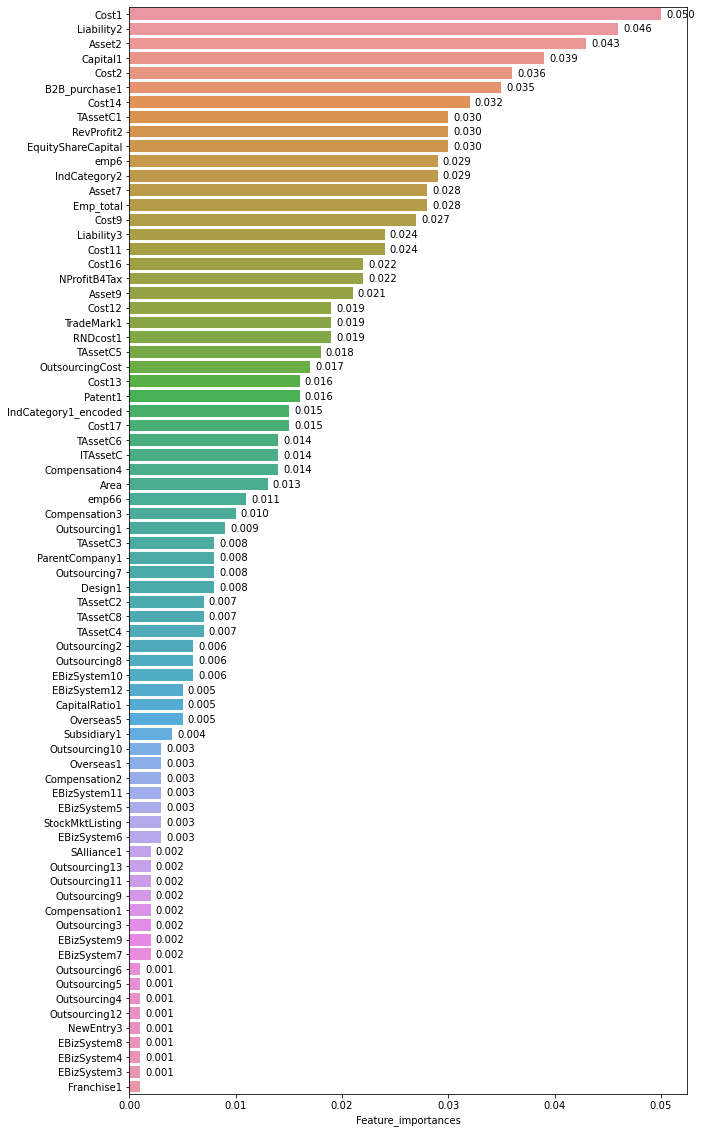

In [22]:
# 데이터프레임 dft1의 막대그래프(barplot) 그리기
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 20))
ax = sns.barplot(y=dft1.index, x="Feature_importances", data=dft1)

for p in ax.patches:
    ax.annotate("%.3f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()+1.3),
                xytext=(5, 10), textcoords='offset points')

# C.7.5 Bagging 모델

In [5]:
# Bagging 모델 (n_estimators = 10) (default)
# 이는 10개 decision tree 모형의 ensemble을 의미함
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier 
from sklearn.metrics import accuracy_score

bg = BaggingClassifier(DecisionTreeClassifier(random_state=0, max_depth=4), n_estimators = 10 ,
                       max_samples = 100, random_state = 0, bootstrap = True ,
                       n_jobs =-1, oob_score = True) 
model = bg.fit(X_train2, y_train) 
pred = model.predict(X_test2)

print ("Bagging Accuracy on training set:{:.5f}".format(model.score(X_train2, y_train))) 
print ("Bagging Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred))) 

Bagging Accuracy on training set:0.69104
Bagging Accuracy on test set:0.68127


In [6]:
# Bagging for Decision Tree 모델 (디폴트 Decision Tree 모델 사용)
bg = BaggingClassifier(DecisionTreeClassifier(random_state=0, max_depth=4), n_estimators = 10 ,
                       max_samples = 100, random_state = 0, bootstrap = True ,
                       n_jobs =-1, oob_score = True) 

In [7]:
# 아래 코딩 실행에 약간의 시간 소요
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold  

# StratifiedKFold의 random_state 옵션값을 특정 숫자(예: 0)로 고정
cross_validation = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
params = {'n_estimators':[10, 50],'base_estimator__max_depth': range(2,21)}

grid_bg = GridSearchCV(bg, param_grid=params, scoring='accuracy', cv=cross_validation,
                       n_jobs=-1)
grid_bg.fit(X_train2, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_bg.best_score_))
print("GridSearchCV best parameter:", (grid_bg.best_params_))

GridSearchCV max accuracy:0.69797
GridSearchCV best parameter: {'base_estimator__max_depth': 8, 'n_estimators': 50}


In [8]:
# 아래 코딩 실행에 1분 이상 소요
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold  

# StratifiedKFold의 random_state 옵션값을 특정 숫자(예: 0)로 고정
cross_validation = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
params = {'n_estimators':[100, 200],'base_estimator__max_depth': range(2,21)}

grid_bg = GridSearchCV(bg, param_grid=params, scoring='accuracy', cv=cross_validation,\
                       n_jobs=-1)
grid_bg.fit(X_train2, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_bg.best_score_))
print("GridSearchCV best parameter:", (grid_bg.best_params_)) 

GridSearchCV max accuracy:0.70248
GridSearchCV best parameter: {'base_estimator__max_depth': 9, 'n_estimators': 200}


In [9]:
best_clf = grid_bg.best_estimator_
pred = best_clf.predict(X_test2)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test,best_clf.predict_proba(X_test2)[:, 1])
print("ROC AUC on test set:{:.5f}".format(ROC_AUC))

Accuracy on test set:0.69931
ROC AUC on test set:0.75914


In [ ]:
# 'BaggingClassifier' object has no attribute 'feature_importances_'

# C.7.6 Gradient Boosting 모델

In [ ]:
# 결과의 재생산성은 계속 봐야 함

In [10]:
# Gradient Boosting 모델 (Default 모델)
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.metrics import accuracy_score
gb = GradientBoostingClassifier(random_state = 0) 
model = gb.fit(X_train2, y_train)
pred = model.predict(X_test2)  # 학습된 Classifier로 테스트 데이터셋 자료 투입해서 타겟변수 예측값 생성

print ("grbt Accuracy on training set:{:.5f}".format(model.score(X_train2, y_train))) 
print ("grbt Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred))) 

grbt Accuracy on training set:0.77851
grbt Accuracy on test set:0.72749


In [15]:
# Gradient Boosting 모델 (Default 모델)
gb = GradientBoostingClassifier(random_state = 0) 

In [16]:
# 아래 코딩 실행에 79.51초 소요.
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold  

# StratifiedKFold의 random_state 옵션값을 특정 숫자(예: 0)로 고정합니다.
cross_validation = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
params = {'max_depth': range(3, 11), 'n_estimators':[100,200]}

grid_gb = GridSearchCV(gb, param_grid=params, scoring='accuracy', cv=cross_validation,\
                       n_jobs=-1)
grid_gb.fit(X_train2, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_gb.best_score_))
print("GridSearchCV best parameter:", (grid_gb.best_params_)) 

GridSearchCV max accuracy:0.72020
GridSearchCV best parameter: {'max_depth': 3, 'n_estimators': 200}


In [17]:
# 아래 코딩 실행에 124.32초 소요
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold  

# StratifiedKFold의 random_state 옵션값을 특정 숫자(예: 0)로 고정합니다.
cross_validation = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
params = {'max_depth': range(3, 6), 'n_estimators':[100,200],\
          'learning_rate':[0.001, 0.01, 0.1, 1]}

grid_gb = GridSearchCV(gb, param_grid=params, scoring='accuracy', cv=cross_validation,\
                       n_jobs=-1)
grid_gb.fit(X_train2, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_gb.best_score_))
print("GridSearchCV best parameter:", (grid_gb.best_params_)) 

GridSearchCV max accuracy:0.72020
GridSearchCV best parameter: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


In [18]:
best_clf = grid_gb.best_estimator_
pred = best_clf.predict(X_test2)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test, best_clf.predict_proba(X_test2)[:, 1])
print("ROC AUC on test set:{:.5f}".format(ROC_AUC))

Accuracy on test set:0.72298
ROC AUC on test set:0.78503


In [18]:
# 데이터프레임의 행과 열 전체를 보이게 하는 조치를 (필요시) 추가
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

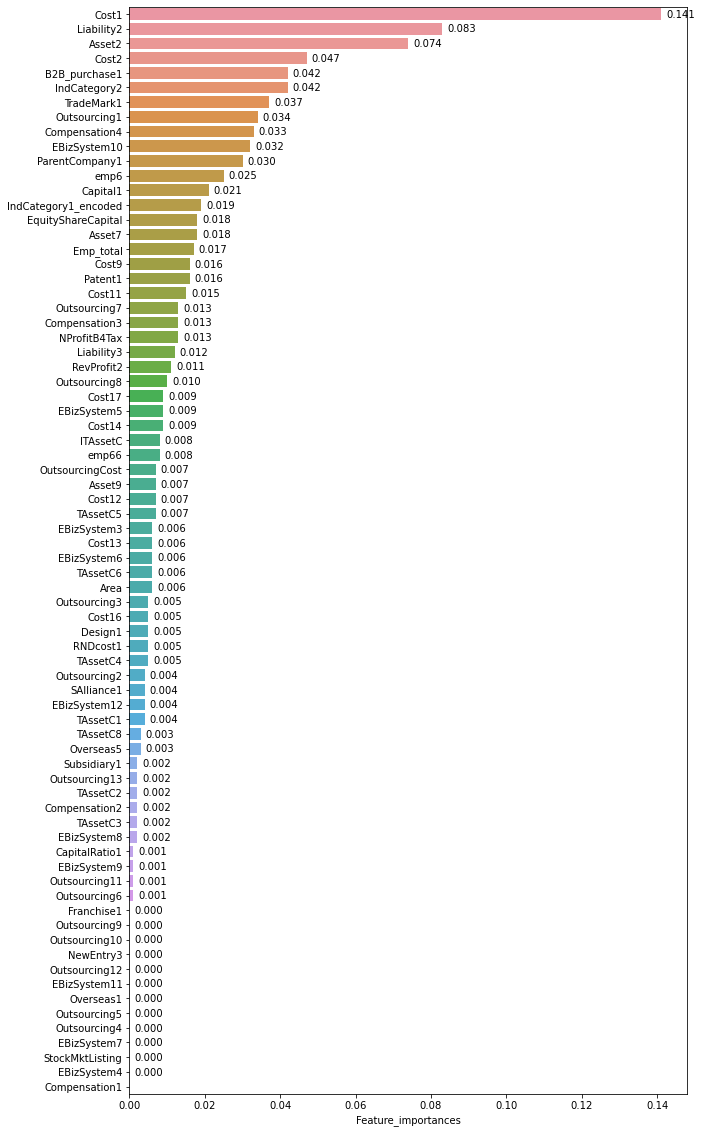

In [19]:
# 변수명을 Index로 만들고 feature_importances를 매칭해서 나열한 데이터프레임 만들기 
feature_names = list(data.columns)   # 변수명(컬럼명)을 리스트 형태로 만들기
dft = pd.DataFrame(np.round(best_clf.feature_importances_, 3), index=feature_names,
                   columns=['Feature_importances'])
dft1 = dft.sort_values(by='Feature_importances', ascending=False)   
                               # 컬럼 Feature_importances의 값들을 내림차순으로 정리 

# 데이터프레임 dft1의 막대그래프(barplot) 그리기
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 20))
ax = sns.barplot(y=dft1.index, x="Feature_importances", data=dft1)

for p in ax.patches:
    ax.annotate("%.3f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()+1.3),
                xytext=(5, 10), textcoords='offset points')